# Utils Tutorial

In [1]:
# imports
from pylanetary.utils import *
import numpy as np
import matplotlib.pyplot as plt

## unit conversions

In [2]:
Tb = 100 #K
freq = 115.271 #GHz
beamx = 0.4 #arcsec
beamy = beamx

jybm = tb_to_jybm(Tb, freq, beamx, beamy)
print(f'Result is {jybm} Jy/beam')

jysr = jybm_to_jysr(jybm, beamx, beamy)
print(f'which translates to {jysr} Jy/sr.')

jysr_rj = rayleigh_jeans(Tb, freq)
print(f'The above is using the Rayleigh-Jeans approximation, and could have been done in one step: {jysr_rj} Jy/sr')

jysr = planck(Tb, freq)
print(f'Using the full Planck function we get: {jysr} Jy/sr')

beamA = beam_area(beamx, beamy)
print(f'The angular area of the beam is {beamA} arcsec^2 assuming Gaussian shape')



Result is 0.17426102873442623 Jy/beam
which translates to 40851198324.166 Jy/sr.
The above is using the Rayleigh-Jeans approximation, and could have been done in one step: 40822885793.88541 Jy/sr
Using the full Planck function we get: 39704080358.999504 Jy/sr
The angular area of the beam is 0.18129440567308777 arcsec^2 assuming Gaussian shape


## I/F calculation

definition from Hammel et al 1989, DOI:10.1016/0019-1035(89)90149-8

Let's calculate the I/F of Proteus in H-band from a measurement in erg s-1 cm-2 um-1.



Proteus solid angle is 6.55e-15 sr = 0.000278 arcsec^2


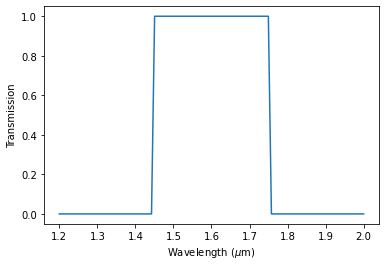

Proteus I/F at 1.60 um = 0.11


In [3]:
observed_flux = 7e-14 #erg s-1 cm-2 um-1
neptune_earth_dist = 4.6e9 #km
neptune_sun_dist = 4.3e9 #km

r = 210 #km; radius of Proteus
dS = np.pi*r**2

# find the solid angle of Proteus
Omega = solid_angle(dS, neptune_earth_dist)
print(f'Proteus solid angle is {Omega:.2e} sr = {Omega*4.25e10:.6f} arcsec^2')

# example transmission curve for roughly H-band
wls = np.linspace(1.2, 2.0, 100) #microns
trans = np.zeros(wls.shape)
trans[wls < 1.75] = 1.0
trans[wls < 1.45] = 0.0
bp = np.array([wls, trans])

plt.plot(wls, trans)
plt.xlabel(r'Wavelength ($\mu$m)')
plt.ylabel('Transmission')
plt.show()

# find I/F in that filter
wl_eff, IoverF = I_over_F(observed_flux, bp, neptune_sun_dist/1.5e8, Omega)
print(f'Proteus I/F at {wl_eff:.2f} um = {IoverF:.2f}')

## The Body utility for planet/moon attributes

Given the name of a planet or large moon, load static data like mass, equatorial and polar radii, orbital parameters. Also load an ephemeris from Horizons.

In [4]:
jup = Body('Jupiter')
print(f'{jup.name} has equatorial, polar radii {jup.req}, {jup.rpol}')
print(f'{jup.name} has a {jup.t_rot_hrs} sidereal day')

Jupiter has equatorial, polar radii 71492.0 km, 66854.0 km
Jupiter has a 9.925 h sidereal day


In [5]:
# assumes datetime.now() and center of earth
print(jup.ephem)

  targetname      datetime_str        datetime_jd    solar_presence lunar_presence    RA      DEC     RA_app  DEC_app  RA_rate    DEC_rate   AZ  EL   AZ_rate      EL_rate      sat_X      sat_Y   sat_PANG siderealtime airmass magextinct   V      surfbright  illumination illum_defect sat_sep  sat_vis ang_width  PDObsLon  PDObsLat  PDSunLon  PDSunLat SubSol_ang SubSol_dist NPole_ang NPole_dist  EclLon  EclLat       r          r_rate       delta        delta_rate  lighttime   vel_sun    vel_obs    elong   elongFlag  alpha  lunar_elong lunar_illum sat_alpha sunTargetPA velocityPA OrbPlaneAng constellation   TDB-UT  ObsEclLon ObsEclLat   NPole_RA NPole_DEC   GlxLon     GlxLat   solartime earth_lighttime RA_3sigma DEC_3sigma SMAA_3sigma SMIA_3sigma Theta_3sigma Area_3sigma RSS_3sigma r_3sigma r_rate_3sigma SBand_3sigma XBand_3sigma DoppDelay_3sigma true_anom hour_angle alpha_true  PABLon  PABLat
     ---              ---                  d              ---            ---         deg      deg 

This ephemeris assumes we wanted the results right now as observed at the center of mass of Earth.  If we instead wanted to observe from the VLA site at the time of the first SL9 impact, we could say:

In [6]:
jup = Body('Jupiter', epoch='1994-07-16 20:13', location='VLA')
print(jup.ephem)

  targetname     datetime_str      datetime_jd    solar_presence lunar_presence     RA       DEC      RA_app   DEC_app   RA_rate    DEC_rate      AZ         EL      AZ_rate      EL_rate      sat_X      sat_Y    sat_PANG siderealtime airmass magextinct   V     surfbright  illumination illum_defect sat_sep  sat_vis ang_width  PDObsLon  PDObsLat PDSunLon PDSunLat SubSol_ang SubSol_dist NPole_ang NPole_dist  EclLon  EclLat       r          r_rate        delta       delta_rate  lighttime   vel_sun   vel_obs    elong   elongFlag alpha  lunar_elong lunar_illum sat_alpha sunTargetPA velocityPA OrbPlaneAng constellation   TDB-UT   ObsEclLon  ObsEclLat  NPole_RA NPole_DEC   GlxLon     GlxLat    solartime   earth_lighttime RA_3sigma DEC_3sigma SMAA_3sigma SMIA_3sigma Theta_3sigma Area_3sigma RSS_3sigma r_3sigma r_rate_3sigma SBand_3sigma XBand_3sigma DoppDelay_3sigma true_anom  hour_angle  alpha_true  PABLon PABLat
     ---             ---                d              ---            ---         